In [1]:
#libraries we will use

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as datetime
import numpy.ma as ma

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression




# Preprocessing

In [2]:
#load the data
test_df = pd.read_csv("/Users/pemawangmo/Desktop/DS_Notes/MACHINE_LEARNING/dataset/Restaurant_Revenue_Prediction/test.csv")
train_df = pd.read_csv("/Users/pemawangmo/Desktop/DS_Notes/MACHINE_LEARNING/dataset/Restaurant_Revenue_Prediction/train.csv")

In [3]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
train_df.shape

(137, 43)

In [5]:
test_df.shape

(100000, 42)

In [6]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


# Data exploration/analysis

In [7]:
print("------------Train---------------")
train_df.info()

print("------------Test--------------")
test_df.info()

------------Train---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-nul

Open date, city, city group and type are categorical/object data type which needs to be converted to numerical(both the dataset)

In [8]:
#check for missing values
train_df.isnull().sum()


Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
test_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

in both the dataset there is no missing values

# Cleaning Data

In [10]:
train_df['Open Date'].describe()


count            137
unique           134
top       01/07/2000
freq               2
Name: Open Date, dtype: object

In [11]:
train_data= train_df
now= datetime.datetime.now()
train_data['Open Date']= pd.to_datetime(train_data['Open Date'], format= '%m/%d/%Y')
train_data['years_old']= now.year - pd.DatetimeIndex(train_data['Open Date']).year




In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 44 columns):
Id            137 non-null int64
Open Date     137 non-null datetime64[ns]
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137

In [13]:
test_data= test_df
now= datetime.datetime.now()
test_data['Open Date']= pd.to_datetime(test_data['Open Date'], format= '%m/%d/%Y')
test_data['years_old']= now.year - pd.DatetimeIndex(test_data['Open Date']).year

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
Id            100000 non-null int64
Open Date     100000 non-null datetime64[ns]
City          100000 non-null object
City Group    100000 non-null object
Type          100000 non-null object
P1            100000 non-null int64
P2            100000 non-null float64
P3            100000 non-null float64
P4            100000 non-null float64
P5            100000 non-null int64
P6            100000 non-null int64
P7            100000 non-null int64
P8            100000 non-null int64
P9            100000 non-null int64
P10           100000 non-null int64
P11           100000 non-null int64
P12           100000 non-null int64
P13           100000 non-null float64
P14           100000 non-null int64
P15           100000 non-null int64
P16           100000 non-null int64
P17           100000 non-null int64
P18           100000 non-null int64
P19           100000 non-null int64
P20   

In [15]:
train_df['City Group'].describe()


count            137
unique             2
top       Big Cities
freq              78
Name: City Group, dtype: object

In [16]:
#convert city type
city_group = {"Big Cities": 0, "Other": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['City Group'] = dataset['City Group'].map(city_group)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 44 columns):
Id            137 non-null int64
Open Date     137 non-null datetime64[ns]
City          137 non-null object
City Group    137 non-null int64
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 

In [18]:
train_df['Type'].describe()


count     137
unique      3
top        FC
freq       76
Name: Type, dtype: object

In [19]:
#convert type
types = {"IL": 0, "FC": 1, "DT": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Type'] = dataset['Type'].map(types)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
trainData = train_df

trainData['City']= le.fit_transform(trainData['City']) 

testData = test_df
testData['City'] = le.fit_transform(testData['City'])


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 44 columns):
Id            137 non-null int64
Open Date     137 non-null datetime64[ns]
City          137 non-null int64
City Group    137 non-null int64
Type          137 non-null int64
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 no

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
Id            100000 non-null int64
Open Date     100000 non-null datetime64[ns]
City          100000 non-null int64
City Group    100000 non-null int64
Type          99710 non-null float64
P1            100000 non-null int64
P2            100000 non-null float64
P3            100000 non-null float64
P4            100000 non-null float64
P5            100000 non-null int64
P6            100000 non-null int64
P7            100000 non-null int64
P8            100000 non-null int64
P9            100000 non-null int64
P10           100000 non-null int64
P11           100000 non-null int64
P12           100000 non-null int64
P13           100000 non-null float64
P14           100000 non-null int64
P15           100000 non-null int64
P16           100000 non-null int64
P17           100000 non-null int64
P18           100000 non-null int64
P19           100000 non-null int64
P20     

In [23]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,years_old
0,0,1999-07-17,31,0,0,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,21
1,1,2008-02-14,3,0,1,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,12
2,2,2013-03-09,10,1,0,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,7
3,3,2012-02-02,28,1,0,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,8
4,4,2009-05-09,14,1,0,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,11


In [24]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,years_old
0,0,2011-01-22,38,1,1.0,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,9
1,1,2011-03-18,27,1,0.0,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9
2,2,2013-10-30,3,0,1.0,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,7
3,3,2013-05-06,26,1,0.0,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,7
4,4,2013-07-31,1,1,1.0,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,7


# Analysis

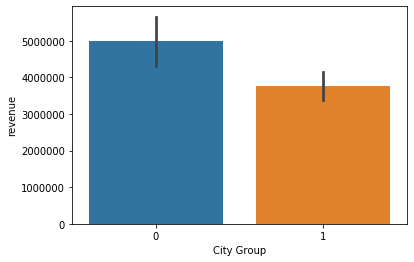

In [25]:
#city_group = {"Big Cities": 0, "Other": 1}

bp = sns.barplot(x='City Group',y='revenue', data=train_df)


It seems that there is strong correlation between city group and revenue

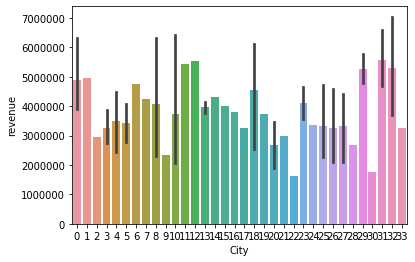

In [26]:
bp = sns.barplot(x='City',y='revenue', data=train_df)


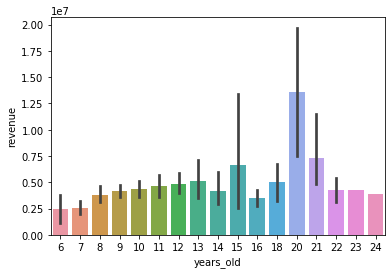

In [27]:
bp = sns.barplot(x='years_old',y='revenue', data=train_df)


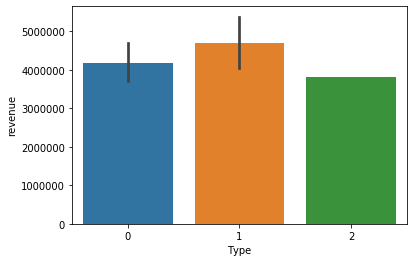

In [28]:
#types = {"IL": 0, "FC": 1, "DT": 2}

bp = sns.barplot(x='Type',y='revenue', data=train_df)


# Performance Evaluation

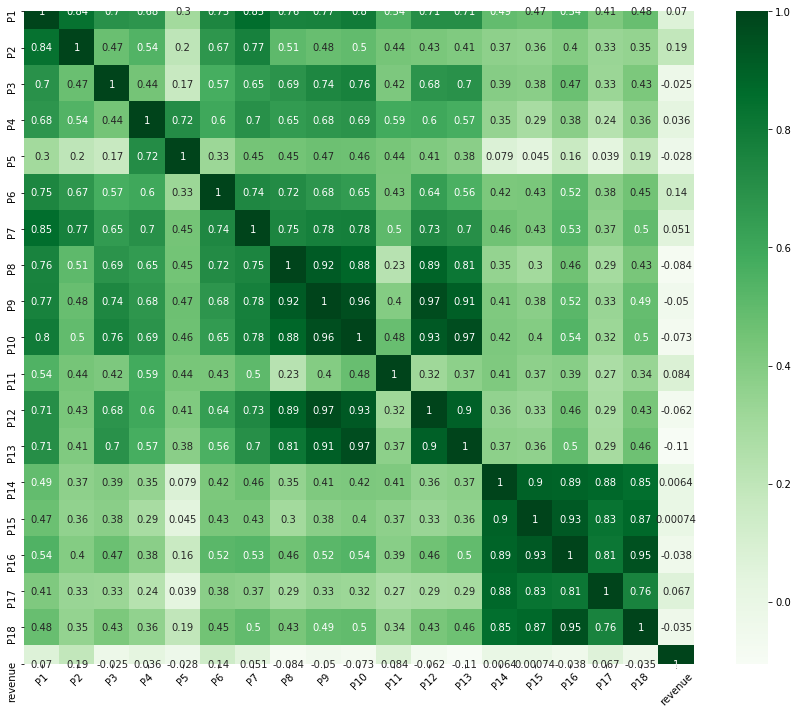

In [29]:
# Plotting heatmap between revenue and P variables
fig=plt.figure(figsize=(15,12))
features=(train_df.loc[:,'P1':'P18']).columns.tolist()
sns.heatmap(train_df[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()

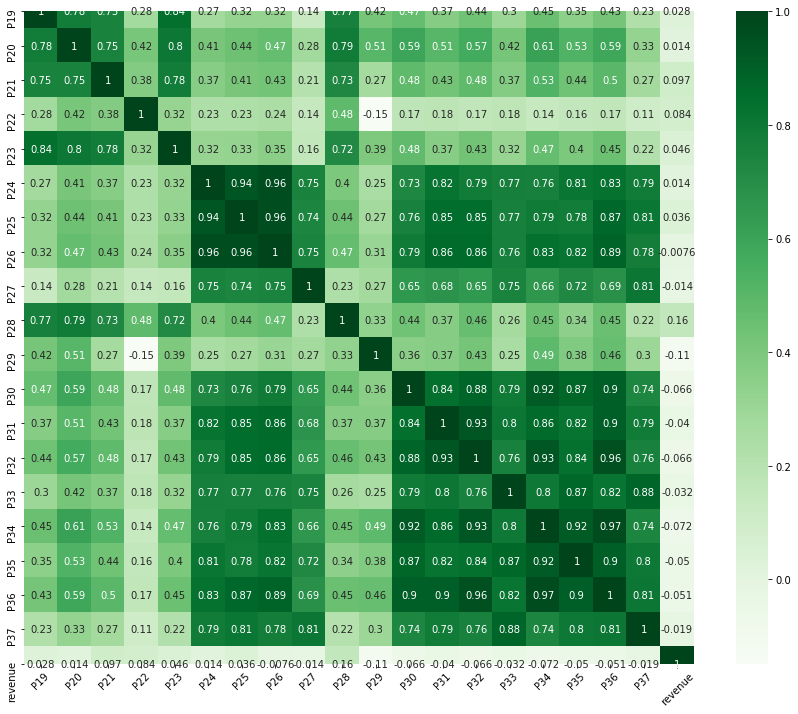

In [30]:
fig=plt.figure(figsize=(15,12))
features=(train_df.loc[:,'P19':'P37']).columns.tolist()
sns.heatmap(train_df[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()

From the above plots it is quite visible that the correlation between revenue and the P's variables are quite weak. Either these values act as a noise or they need transformation.

Transforming the P features to its square root form. After tranformation, the features are further standardized by scaling them

In [31]:
# Square root of the P variables
ntrain= np.sqrt(train_df.loc[:,'P1':'P37'])
ntest= np.sqrt(test_df.loc[:,'P1':'P37'])
ntrain.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2.000000,2.236068,2.000000,2.000000,1.414214,1.414214,2.236068,2.000000,2.236068,2.236068,...,1.414214,1.732051,2.236068,1.732051,2.000000,2.236068,2.236068,2.000000,1.732051,2.000000
1,2.000000,2.236068,2.000000,2.000000,1.000000,1.414214,2.236068,2.236068,2.236068,2.236068,...,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.414214,2.000000,1.414214,2.236068,1.414214,1.732051,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.449490,2.121320,2.449490,2.449490,2.000000,2.000000,3.162278,2.828427,3.162278,3.162278,...,1.581139,2.738613,5.000000,3.464102,3.162278,2.449490,4.242641,3.464102,3.464102,2.449490
4,1.732051,2.000000,1.732051,2.000000,1.414214,1.414214,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,2.236068,1.000000,1.732051,1.414214,1.732051,2.000000,1.732051,1.732051


In [32]:
ntest.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1.000000,2.0,2.0,2.0,1.000000,1.414214,2.236068,2.000000,2.236068,2.236068,...,1.414214,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.732051,2.0,2.0,2.0,1.414214,1.414214,2.236068,1.732051,2.000000,2.000000,...,1.000000,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.732051,2.0,2.0,2.0,1.414214,1.414214,2.236068,2.000000,2.000000,2.236068,...,1.414214,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.414214,2.0,2.0,2.0,1.414214,1.732051,2.236068,2.000000,2.236068,2.000000,...,1.414214,1.732051,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.414214,2.0,2.0,2.0,1.000000,1.414214,2.236068,2.000000,2.236068,2.000000,...,2.236068,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Scaling the data using StandardScaler. This will normalize the datapoints by subtracting from mean 
# and dividing by standard deviation
class DataFrameScale:
    def __init__(self,df):
        self.df =df
    def dataScaling(self):
        x_cols= self.df.columns    
        scaler= StandardScaler()      
        df= scaler.fit_transform(self.df)
        df=pd.DataFrame(df, columns = x_cols)
        return df
scal_train = DataFrameScale(ntrain)
ntrain = scal_train.dataScaling()
scal_test = DataFrameScale(ntest)
ntest = scal_test.dataScaling()
ntrain.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0.154045,0.446850,-0.201271,-0.333476,0.124617,-0.654496,-0.067010,-0.626121,-0.199544,-0.225338,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,0.154045,0.446850,-0.201271,-0.333476,-1.005005,-0.654496,-0.067010,-0.005152,-0.199544,-0.225338,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,-0.783627,-0.166776,-2.238525,0.677030,0.124617,-0.046356,-0.067010,-0.005152,-0.199544,-0.225338,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,0.873546,0.148580,1.361969,1.590598,1.722145,0.466330,1.724665,1.553030,2.421213,2.388412,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,-0.274863,-0.166776,-1.133147,-0.333476,0.124617,-0.654496,-0.067010,-0.005152,-0.199544,-0.225338,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [34]:
ntest.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,-1.561347,-0.209338,-0.178779,-0.352733,-1.073139,-0.564399,-0.025698,-0.530590,-0.093587,-0.223919,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
1,-0.334710,-0.209338,-0.178779,-0.352733,0.134209,-0.564399,-0.025698,-1.274307,-0.802211,-0.921709,...,-1.352940,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
2,-0.334710,-0.209338,-0.178779,-0.352733,0.134209,-0.564399,-0.025698,-0.530590,-0.802211,-0.223919,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
3,-0.867283,-0.209338,-0.178779,-0.352733,0.134209,0.206783,-0.025698,-0.530590,-0.093587,-0.921709,...,-0.572591,0.107356,-0.650834,1.533622,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
4,-0.867283,-0.209338,-0.178779,-0.352733,-1.073139,-0.564399,-0.025698,-0.530590,-0.093587,-0.921709,...,0.975726,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723


Concatenation of P columns and rest of the columns excluding P

In [35]:
train = train_df[train_df.columns[train_df.columns.isin(['Id','City','City Group','Type','years_old','revenue'])]]
train = pd.concat([train,ntrain],axis=1)
test = test_df[test_df.columns[test_df.columns.isin(['Id','City','City Group','Type','years_old'])]]
test = pd.concat([test,ntest],axis=1)
train.head()

,Id,City,City Group,Type,revenue,years_old,P1,P2,P3,P4,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,0,5653753.0,21,0.154045,0.446850,-0.201271,-0.333476,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,3,0,1,6923131.0,12,0.154045,0.446850,-0.201271,-0.333476,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,10,1,0,2055379.0,7,-0.783627,-0.166776,-2.238525,0.677030,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,28,1,0,2675511.0,8,0.873546,0.148580,1.361969,1.590598,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,14,1,0,4316715.0,11,-0.274863,-0.166776,-1.133147,-0.333476,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [36]:
test.head()

,Id,City,City Group,Type,years_old,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,38,1,1.0,9,-1.561347,-0.209338,-0.178779,-0.352733,-1.073139,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
1,1,27,1,0.0,9,-0.334710,-0.209338,-0.178779,-0.352733,0.134209,...,-1.352940,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
2,2,3,0,1.0,7,-0.334710,-0.209338,-0.178779,-0.352733,0.134209,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
3,3,26,1,0.0,7,-0.867283,-0.209338,-0.178779,-0.352733,0.134209,...,-0.572591,0.107356,-0.650834,1.533622,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
4,4,1,1,1.0,7,-0.867283,-0.209338,-0.178779,-0.352733,-1.073139,...,0.975726,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723


test and train splitting

In [37]:
y_train = train.loc[:,'revenue']  #train target variable
x_train = train[train.columns[~train.columns.isin(['Open Date','revenue'])]]  #train features to be fit in model
x_test = test[test.columns[~test.columns.isin(['Open Date'])]]  #test features

In [38]:
x_train.head()

,Id,City,City Group,Type,years_old,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,0,21,0.154045,0.446850,-0.201271,-0.333476,0.124617,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,3,0,1,12,0.154045,0.446850,-0.201271,-0.333476,-1.005005,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,10,1,0,7,-0.783627,-0.166776,-2.238525,0.677030,0.124617,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,28,1,0,8,0.873546,0.148580,1.361969,1.590598,1.722145,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,14,1,0,11,-0.274863,-0.166776,-1.133147,-0.333476,0.124617,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [39]:
x_test.head()

,Id,City,City Group,Type,years_old,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,38,1,1.0,9,-1.561347,-0.209338,-0.178779,-0.352733,-1.073139,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
1,1,27,1,0.0,9,-0.334710,-0.209338,-0.178779,-0.352733,0.134209,...,-1.352940,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
2,2,3,0,1.0,7,-0.334710,-0.209338,-0.178779,-0.352733,0.134209,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
3,3,26,1,0.0,7,-0.867283,-0.209338,-0.178779,-0.352733,0.134209,...,-0.572591,0.107356,-0.650834,1.533622,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
4,4,1,1,1.0,7,-0.867283,-0.209338,-0.178779,-0.352733,-1.073139,...,0.975726,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723


ValueError: Input contains NaN, infinity or a value too large for dtype('float64')


In [40]:
#np.where(x_test.values >= np.finfo(np.float64).max)


In [41]:
#np.isnan(x_test.values.any())


In [42]:
#to check nan value if there is any

np.where(np.isnan(x_test), ma.array(x_test, mask=np.isnan(x_test)).mean(axis=0), x_test) 

array([[ 0.00000000e+00,  3.80000000e+01,  1.00000000e+00, ...,
        -6.75864458e-01, -6.65408512e-01, -6.73722582e-01],
       [ 1.00000000e+00,  2.70000000e+01,  1.00000000e+00, ...,
        -6.75864458e-01, -6.65408512e-01, -6.73722582e-01],
       [ 2.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
        -6.75864458e-01, -6.65408512e-01, -6.73722582e-01],
       ...,
       [ 9.99970000e+04,  5.40000000e+01,  0.00000000e+00, ...,
         1.10720307e+00,  1.04664602e+00,  1.05455941e+00],
       [ 9.99980000e+04,  5.40000000e+01,  0.00000000e+00, ...,
        -6.75864458e-01, -6.65408512e-01, -6.73722582e-01],
       [ 9.99990000e+04,  5.40000000e+01,  0.00000000e+00, ...,
         1.10720307e+00,  5.45196856e-01, -6.73722582e-01]])

In [43]:
#for infinity values
x_test[x_test==np.inf]=np.nan
x_test.fillna(x_test.mean(), inplace=True)


In [44]:
#dimensionality reduction

pca = PCA().fit(x_train)
itemindex = np.where(np.cumsum(pca.explained_variance_ratio_)>0.999)

pca_std = PCA(n_components=itemindex[0][0]).fit(x_train)
train_df = pca_std.transform(x_train)
test_df = pca_std.transform(x_test)

In [45]:
train_df.shape

(137, 15)

In [46]:
test_df.shape

(100000, 15)

# Build Model

In [47]:
# Applying Linear Regression

linReg = LinearRegression()
linReg.fit(x_train, y_train)
predictions = linReg.predict(x_test)

In [48]:
test_x = x_test.drop('Id',axis=1)


In [49]:
final_prediction = pd.DataFrame({'Id':x_test['Id'],'Prediction':predictions})


In [50]:
final_prediction.to_csv("restaurant_prediction.csv", index=False)